# Feature Engineering the Model

In this second attempt to increase the model efficiency using a random forest classifier, I will add the feature engineered variables and view the outcome.

Feature engineering is creating new variables from existing variables to gain further insight and analysis into the dataset. Adding new variables to the algorithm may increase accuracy.

## Import Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train = pd.read_csv("https://www.dropbox.com/s/1xyc3klpx2mtrqf/train.csv?dl=1")
test = pd.read_csv("https://www.dropbox.com/s/7n7k0f676i6nbng/test.csv?dl=1")

In [6]:
# fill missing values
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
train['Embarked'] = train['Embarked'].fillna('S')

## Add Variables

In [7]:
# review of variables before encoding
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# add FamilySize
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
test['FamilySize'] = test['Parch'] + test['SibSp'] + 1

In [9]:
# add isAlone
train['isAlone'] = train['FamilySize'].map(lambda x: 1 if x == 1 else 0)
test['isAlone'] = test['FamilySize'].map(lambda x: 1 if x == 1 else 0)

In [10]:
# add hasCabin
train['hasCabin'] = train['Cabin'].notnull().astype(int)
test['hasCabin'] = test['Cabin'].notnull().astype(int)

In [11]:
# add Ticket_Len
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))
test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))

In [12]:
# add Title
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

In [13]:
# add Name_Len
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
test['Name_Len'] = test['Name'].apply(lambda x: len(x))

In [14]:
# drop less useful variables
train.drop(labels=(['Cabin','Name', 'Parch', 'SibSp', 'Ticket']), axis=1, inplace=True)
test.drop(labels=(['Cabin','Name', 'Parch', 'SibSp', 'Ticket']), axis=1, inplace=True)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,hasCabin,Ticket_Len,Title,Name_Len
0,1,0,3,male,22.0,7.2500,S,2,0,0,9,Mr.,23
1,2,1,1,female,38.0,71.2833,C,2,0,1,8,Mrs.,51
2,3,1,3,female,26.0,7.9250,S,1,1,0,16,Miss.,22
3,4,1,1,female,35.0,53.1000,S,2,0,1,6,Mrs.,44
4,5,0,3,male,35.0,8.0500,S,1,1,0,6,Mr.,24


## Convert Variables

In [17]:
# encode variables
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1
test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1

In [18]:
train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2
test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2

In [ ]:
train.loc[train['Title'] == 'Mr.', 'Title'] = 0
train.loc[train['Title'] == 'Mrs.', 'Title'] = 1
train.loc[train['Title'] == 'Master.', 'Title'] = 2
train.loc[train['Title'] == 'Dr.', 'Title'] = 3
train.loc[train['Title'] == 'Rev.', 'Title'] = 4
train.loc[train['Title'] == 'Mlle.', 'Title'] = 5
train.loc[train['Title'] == 'Col.', 'Title'] = 6
train.loc[train['Title'] == 'Major.', 'Title'] = 7
train.loc[train['Title'] == 'the', 'Title'] = 8
train.loc[train['Title'] == 'Don.', 'Title'] = 9
train.loc[train['Title'] == 'Capt.', 'Title'] = 10
train.loc[train['Title'] == 'Mme.', 'Title'] = 11
train.loc[train['Title'] == 'Lady.', 'Title'] = 12
train.loc[train['Title'] == 'Jonkheer.', 'Title'] = 13
train.loc[train['Title'] == 'Sir.', 'Title'] = 14
train.loc[train['Title'] == 'Ms.', 'Title'] = 15

In [23]:
train.loc[train['Title'] == 'Miss.', 'Title'] = 16

In [30]:
test.loc[test['Title'] == 'Mr.', 'Title'] = 0
test.loc[test['Title'] == 'Mrs.', 'Title'] = 1
test.loc[test['Title'] == 'Master.', 'Title'] = 2
test.loc[test['Title'] == 'Dr.', 'Title'] = 3
test.loc[test['Title'] == 'Rev.', 'Title'] = 4
test.loc[test['Title'] == 'Mlle.', 'Title'] = 5
test.loc[test['Title'] == 'Col.', 'Title'] = 6
test.loc[test['Title'] == 'Major.', 'Title'] = 7
test.loc[test['Title'] == 'the', 'Title'] = 8
test.loc[test['Title'] == 'Don.', 'Title'] = 9
test.loc[test['Title'] == 'Capt.', 'Title'] = 10
test.loc[test['Title'] == 'Mme.', 'Title'] = 11
test.loc[test['Title'] == 'Lady.', 'Title'] = 12
test.loc[test['Title'] == 'Jonkheer.', 'Title'] = 13
test.loc[test['Title'] == 'Sir.', 'Title'] = 14
test.loc[test['Title'] == 'Ms.', 'Title'] = 15
test.loc[test['Title'] == 'Miss.', 'Title'] = 16

In [80]:
test.loc[test['Title'] == 'Dona.', 'Title'] = 17

In [84]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,hasCabin,Ticket_Len,Title,Name_Len
0,1,0,3,0,22.0,7.2500,0,2,0,0,9,0,23
1,2,1,1,1,38.0,71.2833,1,2,0,1,8,1,51
2,3,1,3,1,26.0,7.9250,0,1,1,0,16,16,22
3,4,1,1,1,35.0,53.1000,0,2,0,1,6,1,44
4,5,0,3,0,35.0,8.0500,0,1,1,0,6,0,24


## Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# select variables
target = target = train['Survived'].values
features_forest = train[["Pclass", "Age", "Sex", "Fare", "FamilySize", "isAlone", "hasCabin", "Embarked", "Ticket_Len", "Name_Len", "Title"]].values

# build and fit the random_forest
random_forest = RandomForestClassifier(max_depth = 10, min_samples_split = 2, n_estimators = 100, random_state = 1)
forest = random_forest.fit(features_forest, target)

# print the score of the fitted random forest
print(forest.score(features_forest, target))

0.9584736251402918


In [86]:
# making the prediction - first extract test features
features_forest_test = test[["Pclass", "Age", "Sex", "Fare", "FamilySize", "isAlone", "hasCabin", "Embarked", "Ticket_Len", "Name_Len", "Title"]].values

# make prediction using the test dataset
prediction_forest = forest.predict(features_forest_test)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId = np.array(test["PassengerId"]).astype(int)
forest_solution = pd.DataFrame(prediction_forest, PassengerId, columns = ["Survived"])
forest_solution.head()

,Survived
892,0
893,0
894,0
895,0
896,1


In [87]:
forest_solution.to_csv("randomforest_submission_fe1.csv", columns=['Survived'])

## Feature Importance

In [88]:
forest.feature_importances_

array([0.06864642, 0.12223402, 0.16996139, 0.14493479, 0.06745928,
       0.01046722, 0.0396045 , 0.02453287, 0.05484072, 0.12988189,
       0.1674369 ])

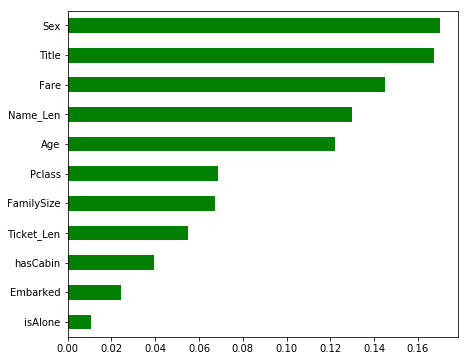

In [89]:
feature_importances = pd.Series(forest.feature_importances_, index=["Pclass", "Age", "Sex", "Fare", "FamilySize", "isAlone", "hasCabin", "Embarked", "Ticket_Len", "Name_Len", "Title"])
feature_importances.sort_values(ascending=True).plot(kind="barh", color="green", figsize=(7,6));

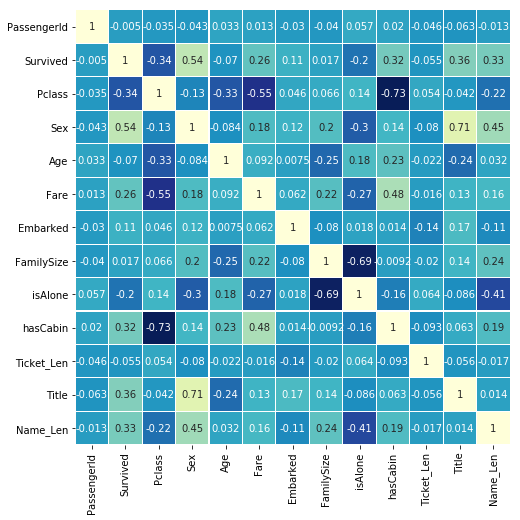

In [90]:
# when all variables have been converted to numeric at the start of an analysis
# a heatmap can quickly show some correlation of important variables
plt.figure(figsize=(10,8))
tc = train.corr()
sns.heatmap(tc, linewidths=0.1, square=True, linecolor='white', annot=True, cbar=False, cmap="YlGnBu_r");

## Result

By using feature engineering methods to create new variables, upon re-submission to the Kaggle competition the accuracy had improved from 74% to 77%.